In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_bocim_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Ocimene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Beta-Ocimene'], axis = 1)
y = df_rf[['X..Beta-Ocimene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.66666667],
       [0.66666667],
       [0.66666667],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

<Axes: ylabel='Count'>

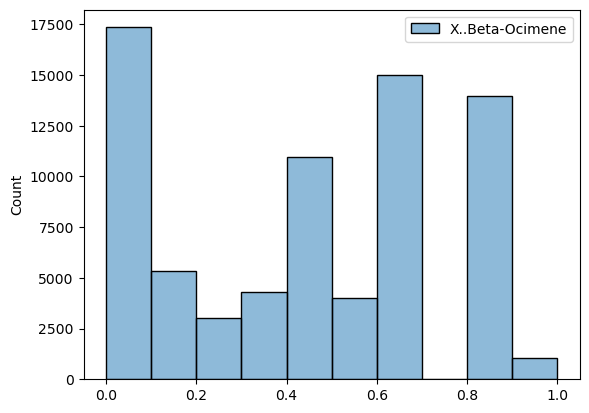

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1576/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.031449297177790714

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.005274533318058214

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07262598238962564

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9865522308708178

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9405840788692162

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.102830
1,lsa_1,0.090634
2,lsa_2,0.107067
3,lsa_3,0.087942
4,lsa_4,0.101713
...,...,...
81,tree,0.000938
82,tropical,0.003682
83,vanilla,0.036127
84,violet,0.000083


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
7,sativa,0.209352
2,lsa_2,0.107067
0,lsa_0,0.102830
4,lsa_4,0.101713
1,lsa_1,0.090634
3,lsa_3,0.087942
83,vanilla,0.036127
5,hybrid,0.029308
64,orange,0.013844
35,talkative,0.010329


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.01330502e-01, 9.10232949e-02, 1.07431676e-01, 9.00475311e-02,
       1.01525679e-01, 2.94748092e-02, 5.83289683e-04, 2.08826472e-01,
       8.55453201e-04, 1.56445632e-03, 3.07545594e-03, 0.00000000e+00,
       6.96174038e-03, 9.23275577e-04, 2.38302627e-03, 3.62262250e-03,
       7.20303817e-03, 6.01844126e-03, 0.00000000e+00, 5.66604668e-03,
       0.00000000e+00, 0.00000000e+00, 6.38449813e-03, 5.70170712e-03,
       7.07743048e-03, 1.43601617e-03, 6.22208738e-03, 7.94335750e-04,
       0.00000000e+00, 2.39304146e-03, 8.92414541e-03, 0.00000000e+00,
       6.49111183e-03, 0.00000000e+00, 0.00000000e+00, 9.97478439e-03,
       4.16049407e-03, 7.04264193e-03, 1.00072406e-03, 1.53684374e-03,
       1.00975591e-04, 7.98529074e-03, 1.57532751e-03, 3.24029803e-03,
       5.07290947e-04, 4.19041021e-03, 8.79597329e-04, 5.56818439e-04,
       7.93108472e-03, 6.11546525e-04, 8.24046446e-03, 6.67179464e-03,
       5.05565592e-03, 8.05438163e-04, 4.23377312e-03, 1.33106201e-03,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_bocim.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_bocim.pkl")

['selected_X_rf_lsa_elbow_bocim.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1576/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.035372169943280504

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.006244531133896862

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0790223457883709

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9756787700021591

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9301428873546366

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_bocim.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_bocim.pkl")

['rscv_rf_lsa_elbow_best_params_bocim.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, max_features = 'auto', min_samples_leaf = 2, max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1576/2462681616.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.04062705540575854

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.006776404627108514

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08231892022559889

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9687395244768591

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9241928575234645

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_bocim.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_bocim.pkl")

['y_test_rfreg_lsa_elbow_bocim.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.03966521998166568

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.0064035485923659655

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.08002217562879659

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9274027567064401

Error analysis

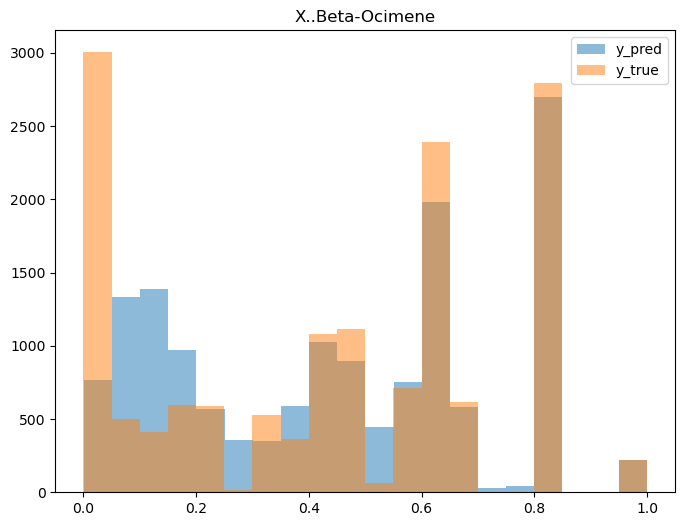

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Ocimene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_bocim.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.965
P-value: 0.000


<Axes: >

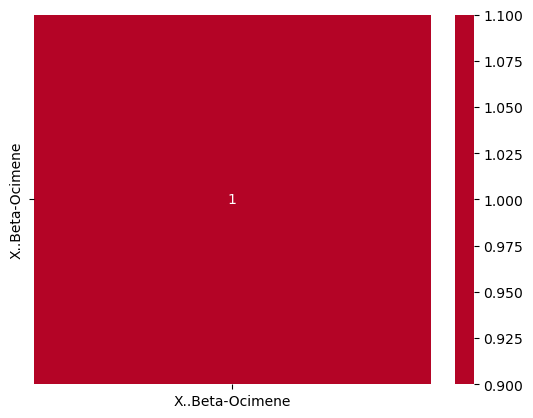

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)